# Лабораторная работа 7
# Алгебра
https://docs.sympy.org/latest/search.html?q=geometry

## Прямые и плоскости в пространстве. Модуль Geometry

 
### Задание 1.

Даны точки: A(3,-2,3),  B(-2,3,1), 
C(1,-8,6), 
D(1,2,4), 
F(-7,8,-1).

Составить словарь всевозможных прямых, проходящих через каждую пару заданных точек

In [2]:
from sympy import*
init_printing(use_unicode = False, wrap_line = False, no_global = True)

In [9]:
A = Point(3, -2, 3)
B = Point(-2, 3, 1)
C = Point(1, -8, 6)
D = Point(1, 2, 4)
F = Point(-7, 8, -1)
print("Составим словарь точек:")
Points_list = [A, B, C, D, F]
Point_names=['A', 'B', 'C', 'D', 'F']
points_numbers = range(len(Point_names))
points = dict([(Point_names[i], Points_list[i]) for i in points_numbers])
display(points)
print("Найдем одинаковые прямые:")
lines = {}
temp = {}
for key1 in points.keys():
    for key2 in points.keys():
        if key1 != key2:
            temp[key1 + key2] = Line3D(points[key1], points[key2])
for tkey in temp.keys():
    flag = True
    for key in lines.keys():
        if tkey != key and lines[key].equals(temp[tkey]):
            print(f"{tkey} = {key} \r\n")
            flag = False
    if flag == True:
        lines[tkey] = temp[tkey]
print("Составим словарь прямых:")
display(lines)

Составим словарь точек:


{'A': Point3D(3, -2, 3),
 'B': Point3D(-2, 3, 1),
 'C': Point3D(1, -8, 6),
 'D': Point3D(1, 2, 4),
 'F': Point3D(-7, 8, -1)}

Найдем одинаковые прямые:
AF = AB 

BA = AB 

BF = AB 

CA = AC 

CB = BC 

DA = AD 

DB = BD 

DC = CD 

FA = AB 

FB = AB 

FC = CF 

FD = DF 

Составим словарь прямых:


{'AB': Line3D(Point3D(3, -2, 3), Point3D(-2, 3, 1)),
 'AC': Line3D(Point3D(3, -2, 3), Point3D(1, -8, 6)),
 'AD': Line3D(Point3D(3, -2, 3), Point3D(1, 2, 4)),
 'BC': Line3D(Point3D(-2, 3, 1), Point3D(1, -8, 6)),
 'BD': Line3D(Point3D(-2, 3, 1), Point3D(1, 2, 4)),
 'CD': Line3D(Point3D(1, -8, 6), Point3D(1, 2, 4)),
 'CF': Line3D(Point3D(1, -8, 6), Point3D(-7, 8, -1)),
 'DF': Line3D(Point3D(1, 2, 4), Point3D(-7, 8, -1))}

### Задание 2.
Составить словарь всевозможных наборов прямых, каждая из которых проходит через две или более точек из условия, 

причем в каждом наборе все прямые имеют общую точку.

Ключ - имя набора, например, linesA

Значение - список прямых


Пользуясь методом are_concurrent проверить, что все прямые каждого набора действительно имеют общую точку

In [17]:
allLineSets = {}
linesSet = []
count = -1
for key in lines.keys():
    if len(linesSet) == 0 or Line.are_concurrent(linesSet[0], lines[key]) == False:
        linesSet = []
        count += 1        
    linesSet.append(lines[key])
    allLines["Lines " + chr(ord('1') + count)] = linesSet
print("Прямые проходящие через 2 и больше точек:")
display(allLines)

Прямые проходящие через 2 и больше точек:


{'Lines 1': [Line3D(Point3D(3, -2, 3), Point3D(-2, 3, 1)),
  Line3D(Point3D(3, -2, 3), Point3D(1, -8, 6)),
  Line3D(Point3D(3, -2, 3), Point3D(1, 2, 4)),
  Line3D(Point3D(-2, 3, 1), Point3D(1, -8, 6)),
  Line3D(Point3D(-2, 3, 1), Point3D(1, 2, 4))],
 'Lines 2': [Line3D(Point3D(1, -8, 6), Point3D(1, 2, 4)),
  Line3D(Point3D(1, -8, 6), Point3D(-7, 8, -1)),
  Line3D(Point3D(1, 2, 4), Point3D(-7, 8, -1))]}

### Задание 3.

Составить словарь всевозможных плоскостей, каждая плоскость проходит через три или более точек из условия.

Указание: однозначно определяют плоскость три точки, не лежащие на одной прямой, в словарь нужно включать только плоскости, однозначно определяемые набором точек из условия

In [22]:
tempPlanes = {}
planes = {}
for key1 in points.keys():
    for key2 in points.keys():
        for key3 in points.keys():
            if(key1 == key3 or key2 == key3 or key1 == key2):
                continue
            if (Line3D(points[key1], points[key2]) in Line3D(points[key2], points[key3])) == False:
                tempPlanes[key1 + key2 + key3] = Plane(points[key1], points[key2], points[key3])
for tkey in tempPlanes.keys():
    flag = True
    for key in planes.keys():
        if tkey != key and planes[key].equals(tempPlanes[tkey]):
            print(f"{tkey} = {key} \r\n")
            flag = False
    if flag == True:
        planes[tkey] = tempPlanes[tkey]
print("Всевозможные плоскости:")
display(planes)

ACB = ABC 

ACF = ABC 

ADB = ABD 

ADC = ACD 

ADF = ABD 

AFC = ABC 

AFD = ABD 

BAC = ABC 

BAD = ABD 

BCA = ABC 

BCF = ABC 

BDA = ABD 

BDC = BCD 

BDF = ABD 

BFC = ABC 

BFD = ABD 

CAB = ABC 

CAD = ACD 

CAF = ABC 

CBA = ABC 

CBD = BCD 

CBF = ABC 

CDA = ACD 

CDB = BCD 

CFA = ABC 

CFB = ABC 

CFD = CDF 

DAB = ABD 

DAC = ACD 

DAF = ABD 

DBA = ABD 

DBC = BCD 

DBF = ABD 

DCA = ACD 

DCB = BCD 

DCF = CDF 

DFA = ABD 

DFB = ABD 

DFC = CDF 

FAC = ABC 

FAD = ABD 

FBC = ABC 

FBD = ABD 

FCA = ABC 

FCB = ABC 

FCD = CDF 

FDA = ABD 

FDB = ABD 

FDC = CDF 

Всевозможные плоскости:


{'ABC': Plane(Point3D(3, -2, 3), (3, 19, 40)),
 'ABD': Plane(Point3D(3, -2, 3), (13, 9, -10)),
 'ACD': Plane(Point3D(3, -2, 3), (-18, -4, -20)),
 'BCD': Plane(Point3D(-2, 3, 1), (-28, 6, 30)),
 'CDF': Plane(Point3D(1, -8, 6), (-38, 16, 80))}

### Задание 4.
Составить словарь всевозможных пучков плоскостей, каждая плоскость проходит через три или более точек из условия.

Пучок плоскостей - множество плоскостей, проходящих через одну общую прямую.

Ключ - имя пучка, например, р1

Значение - список плоскостей


Пользуясь методом are_concurrent проверить, что все плоскости каждого пучка действительно имеют общую прямую

In [36]:
PlaneSets = {}
allPlanes = {}
last = []
count = 0
for lKey in lines.keys():
    for pKey in planes.keys():    
        if len(last) == 0 or planes[pKey].distance(lines[lKey]) == 0:      
            last.append(planes[pKey])
    PlaneSets["Plane set " + chr(ord('1') + count)] = last
    last = []
    count += 1
for tKey in PlaneSets.keys():
    flag = True
    for key in allPlaneSets.keys():
        if tKey != key and allPlaneSets[key] == PlaneSets[tKey]:
            print(f"{tKey} = {key} \r\n")
            flag = False
    if flag == True:
        allPlanes[tKey] = PlaneSets[tKey]
print("Все пучки прямых:")
display(allPlanes)

Plane set 2 = Plane set 1 

Plane set 3 = Plane set 1 

Plane set 4 = Plane set 1 

Plane set 5 = Plane set 1 

Plane set 6 = Plane set 1 

Plane set 7 = Plane set 1 

Plane set 8 = Plane set 1 

Все пучки прямых:


{'Plane set 1': [Plane(Point3D(3, -2, 3), (3, 19, 40)),
  Plane(Point3D(3, -2, 3), (13, 9, -10)),
  Plane(Point3D(3, -2, 3), (-18, -4, -20)),
  Plane(Point3D(-2, 3, 1), (-28, 6, 30)),
  Plane(Point3D(1, -8, 6), (-38, 16, 80))]}

###  Задание 5

Для каждого набора прямых из Задания 2 и каждого пучка плоскостей из Задания 4 найти прямую (плоскость),
ближайшую к началу координат

In [42]:
O = Point3D(0, 0, 0)

for key in allPlanes.keys():
    plane = 0
    dist = 9999999999999
    for cur in allPlanes[key]:
        if(cur.distance(O) < dist):
            plane = cur
            dist = plane.distance(O)
    print(plane)

for key in allLines.keys():
    line = 0
    dist = 9999999999999
    for cur in allLines[key]:
        if(cur.distance(O) < dist):
            line = cur
            dist = line.distance(O)
    print(line)

Plane(Point3D(3, -2, 3), (13, 9, -10))
Line3D(Point3D(3, -2, 3), Point3D(-2, 3, 1))
Line3D(Point3D(1, -8, 6), Point3D(-7, 8, -1))


###  Задание 6

По словарю прямых Задания 1 составить словарь различных прямых

In [31]:
display(lines)

{'AB': Line3D(Point3D(3, -2, 3), Point3D(-2, 3, 1)),
 'AC': Line3D(Point3D(3, -2, 3), Point3D(1, -8, 6)),
 'AD': Line3D(Point3D(3, -2, 3), Point3D(1, 2, 4)),
 'BC': Line3D(Point3D(-2, 3, 1), Point3D(1, -8, 6)),
 'BD': Line3D(Point3D(-2, 3, 1), Point3D(1, 2, 4)),
 'CD': Line3D(Point3D(1, -8, 6), Point3D(1, 2, 4)),
 'CF': Line3D(Point3D(1, -8, 6), Point3D(-7, 8, -1)),
 'DF': Line3D(Point3D(1, 2, 4), Point3D(-7, 8, -1))}

###  Задание 7

Добавить в словарь плоскостей биссектрисы двугранных углов, образованных при пересечении плоскостей АВС и АСD

In [51]:
ABC = planes["ABC"]
ACD = planes["ACD"]
interLine = ABC.intersection(ACD)
n1 = ABC.normal_vector
n1len = sqrt(n1[0]**2 + n1[1]**2 + n1[2]**2)
n2 = ACD.normal_vector
n2len = sqrt(n2[0]**2 + n2[1]**2 + n2[2]**2)
n1 = [n1[i] / n1len for i in range(3)]
n2 = [n2[i] / n2len for i in range(3)]
bn1 = [(n1[i] + n2[i]) / 2 for i in range(3)]
bn2 = [(n1[i] - n2[i]) / 2 for i in range(3)]
planes["биссектрисса 2"] = Plane(interLine[0].random_point(), bn1)
planes["биссектрисса 1"] = Plane(interLine[0].random_point(), bn2)
print("Уравнения плоскостей:")
display(ABC.equation(), ACD.equation())
print("Уравнения биссектрисс:")
display(planes["биссектрисса 1"].equation(), planes["биссектрисса 2"].equation())

Уравнения плоскостей:


Уравнения биссектрисс:


###  Задание 8

На одной (любой) из биссектрис Задания 7 выбрать произвольную точку и найти ассояние от нее до прямой BD

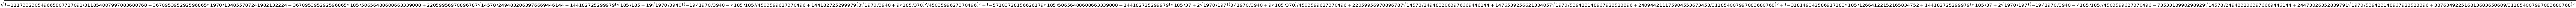

In [54]:
display(lines["BD"].distance(planes["биссектрисса 1"].random_point()))

###  Задание 9

Найти пересечение плоскости АВС и прямой OD, где О - начало координат.

In [55]:
OD = Line3D(Point3D(0, 0, 0), points["D"])
display(planes["ABC"].intersection(OD))

### Индивидуальное задание

Выбрать случайную точку на плоскости АВС и провести через нее  плоскость, параллельную плоскости BDF. Вычислить расстояние от случайной точки до прямой BD.

Выбрать на на плоскости АВС три случайные точки и проверить, лежат ли они на одной прямой.

In [66]:
rndPoint = planes["ABC"].random_point()
parPlane = planes["ABD"].parallel_plane(rndPoint)
display(lines["BD"].distance(rndPoint))
points = [planes["ABC"].random_point() for i in range(3)]
display(Line3D(points[0], points[1]) in Line3D(points[1], points[2]))

False